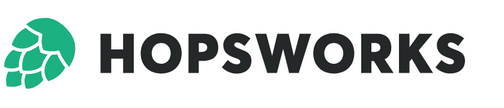

# Part 01: Backfill Features to the Feature Store

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/featurestoreorg/serverless-ml-course/blob/main/nbs/01-module/1a_feature_groups.ipynb)

**Note**: you may get an error when installing hopsworks on Colab, and it is safe to ignore it.


First, you need to install the hopsworks library.

## <span style="color:#ff5f27;"> 💽 Loading the Data </span>

The data you will use comes from ... different sources:

- `PLACE_HOLDER`: description PLACE_HOLDER.
- `PLACE_HOLDER`: description PLACE_HOLDER.
- `PLACE_HOLDER`: description PLACE_HOLDER.

**All these sources have a ... `PLACE_HOLDER` in common (a natural join key).**



Sun

The value of the disturbance value (kP) is pretty obvious - the greater disturbance causing higher chances to see the Aurora. But the ability to "see" is quite challenging, mostly due to the weather.
Weather

Most of the time, the highest impact is caused by the weather. High and low clouds and the cloud cover in general, high humidity and higher temperature. The Aurora looks perfect on photos and in person only when the sky is clear with pretty low temperature and low humidity along with nearly-zero cloud cover.
Positioning

But the weather is not the only factor that may impact chances to witness the Northern Lights. First of all, most of the time with a moderate sun's activity, it's highly recommended to go far north (as close as possible or far beyond the Polar Circle).
Season

The winter season is the best one for chasing the Aurora. During winter months the length of the daytime is pretty short, up to 6 hours, or could even be shorter depending on a country's location.

Thesis
According to the magnetic field disturbance theory, the whole Polar Circle divided onto belts ranged from 0 to 9. Each belt has an assigned magnetic field disturbance coefficient of a 3-hour measure (known as kP). Based on the minimum (minimum enough to see the aurora with the naked eye) kP value, for the particular country within the particular belt, for each observation point (defined as the GPS point) within the country, identify particular dates with recorder kP higher than the minimum kP taking into account weather conditions through the winter night hours (9 PM to 6 AM).
Explanation

Taking into account that nobody collects reports of the aurora observation at ALL locations. The only data we could rely on is - GFZ data
(https://kp.gfz-potsdam.de/en/data). So, having a piece of knowledge regarding minimal values for the disturbance that leads to potential visibility of the lights, it is necessary to figure out historical weather forecasts for the whole Aurora season. With that, we could declare a simple rule:

If the solar wind will cause a great disturbance, with constant good weather (short percentage of cloud cover, 
low humidity, near-to-zero chances of perception), during the winter, at nighttime, 
between 9 PM to 6 AM the chances to see the Northern Lights are pretty high.

In real life, with historical weather forecasts, it is highly possible to identify the number of days, the actual dates, exact locations where the Aurora was visible with the naked eye.

FYI. In most of the northern European countries, winter months are September to April. So, we'll be using these months to check if a good weather day matched Sun's activity.
Algorithm


1. For each country in the rally, filter out days my country's minimum kP during nighttime.
2. For each of the GPS coordinates of a country, check nighttime hours weather of each date filtered at step 1.
3. Using historical weather forecasts, identify whether the particular day was successful to witness the Aurora.
4. Calculate the statistics: successful dates per GPS location, the over dates, the total number of days with the kP value higher than the country's minimal one.

https://api.trafikinfo.trafikverket.se/
http://opendata.smhi.se/apidocs/metfcst/index.html
https://github.com/Wolfrax/tv/blob/3dc8d65b2ea857c33736d44c86e61c31b86b61ad/ws_emitter.py

https://services.swpc.noaa.gov/text/aurora-nowcast-hemi-power.txt
https://services.swpc.noaa.gov/json/ovation_aurora_latest.json

https://www.datamaplab.com/posts/japan-temperature-d3/

In [1]:
import noaa_aurora
a = noaa_aurora.NOAA_Aurora(visible_k_index=5)

In [7]:
a.visible_tonight

False

In [2]:
a.two_day_text_forecast

/Users/davitbzhalava/IdeaProjects/noaa-aurora/util.py:16: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  return tzlocal.get_localzone().localize(datetime.datetime.now())


'Planetary K-Index forecast:\n2022-09-15 15:00:00 UTC    2\n2022-09-15 18:00:00 UTC    1\n2022-09-15 21:00:00 UTC    2\n2022-09-16 00:00:00 UTC    2\n2022-09-16 15:00:00 UTC    2\n2022-09-16 18:00:00 UTC    3\n2022-09-16 21:00:00 UTC    3\n2022-09-17 00:00:00 UTC    4\n'

In [4]:
a.highest_kp_tonight

2

In [5]:
a.highest_kp_tomorrow

4

In [6]:
a.highest_recent_kp

1.0

In [3]:
a.best_guess_now()

False

[0, 0, 0, 0]
0.0


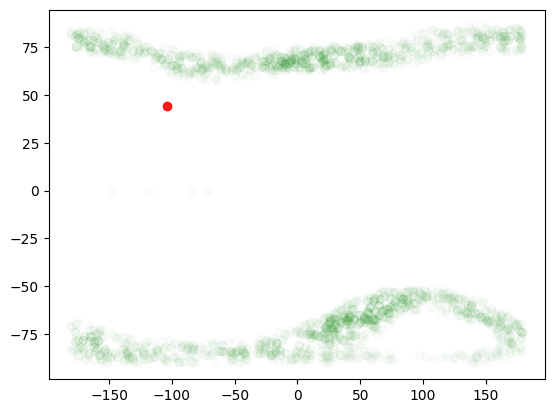

In [9]:
import noaa_ovation
ovation_model = noaa_ovation.NOAA_Ovation()
ovation_model.demo()

## <span style="color:#ff5f27;"> 🛠️ Feature Engineering </span>

FEATURE ENGINEERING DESCRIPTION PLACEHOLDER

## <span style="color:#ff5f27;"> 🪄 Creating Feature Groups </span>

---